In [3]:
# Import packages
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import sklearn as sk
import scipy as sp
import random
from scipy import signal
from copy import copy, deepcopy
from scipy.interpolate import interp1d
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier



In [4]:
#Force Divider Function
def force_divider(x):
    k_outer = 3.738
    k_inner = 0.368
    dist = x/k_inner
    return (k_outer + k_inner)*dist

#FSR model function
def FSR_model(x):
    return 131.2*np.exp(0.7801*x)/1000




In [5]:
#thank you Sala for your 7 second cropped data 
string = "/Users/akhil/Documents/BEST/AkhilProcessingData/Data_sala/test"
dataset = []
file_numbers = np.arange(1,73) 

for num in file_numbers:
    filename = string + str(num) + '.csv'
    d = pd.read_csv(filename, names = ["IND", "time", "FSR_1", "FSR_2", "FSR_3", "FSR_4", "FSR_5", 
                                               "FSR_6", "FSR_7", "FSR_8", "FSR_9", "FSR_10", "FSR_11", "FSR_12",
                                              "ACC_X", "ACC_Y", "ACC_Z"])
    d["time"] = d["time"].apply(lambda x: (x - d["time"][0])*1e-6)   #convert time to seconds
    d = d.drop(columns = ["IND"])
    d = d.to_numpy()
    d[:,1:13] = force_divider(FSR_model(d[:,1:13] *5/1023)) #convert force from raw data to newtons
    

    #interpolation for even time steps 
    length = np.shape(d)[0] 
    new_t = np.linspace(d[0,0],d[length-1,0],length,endpoint = True)
    for col in np.arange(1,16):
        single_FSR = d[:,col]
        time = d[:,0]
        function = interp1d(time, single_FSR)
        new_data = function(new_t)
        d[:,col] = new_data 
    d[:,0] = new_t
    dataset.append(d)
    
print(np.shape(dataset))

(72, 7001, 16)


[0.000e+00 1.000e+00 2.000e+00 ... 6.998e+03 6.999e+03 7.000e+03]


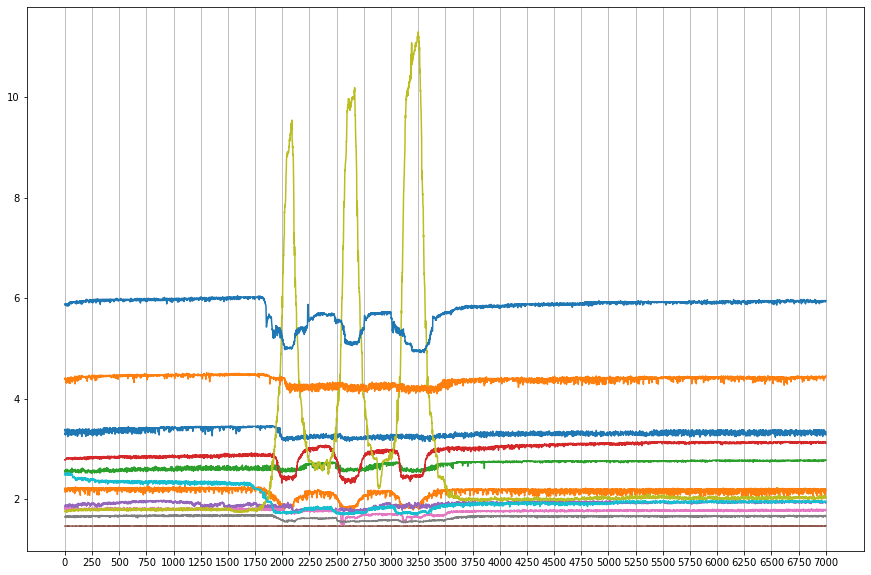

In [6]:

one = dataset[1]
indices = np.linspace(0,length-1,length, endpoint = True)
print(indices)
figure(figsize=(15, 10))
plt.plot(indices, one[:,1:13])
plt.xticks(np.arange(min(indices), max(indices)+1, 250))
plt.gca().xaxis.grid(True)
plt.show()


#put in minor ticks 



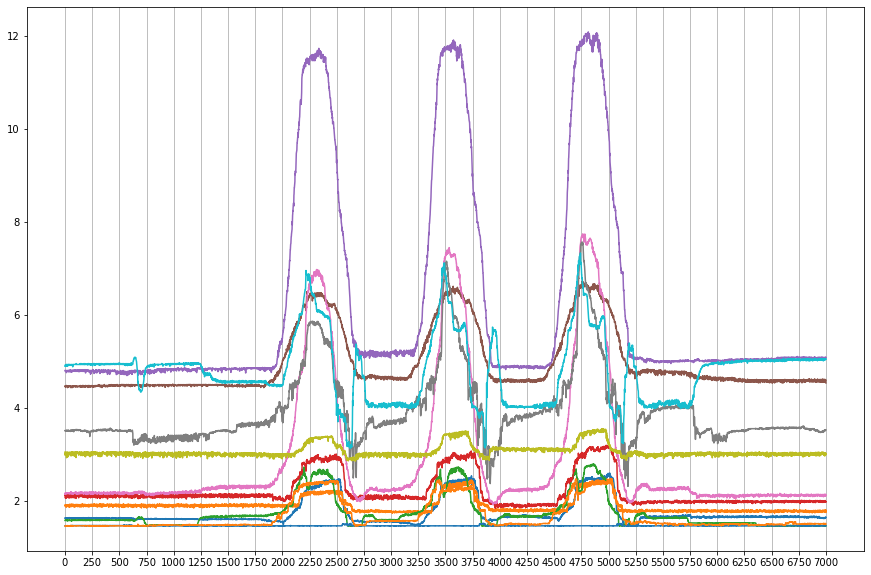

press s to stop collecting indices


In [ ]:
##### plots full data
#asks user to pick indices
#provides graphs of individual sections
#asks user to enter labels for each section
#spits out matrix for full data in format I determined earlier
#[[[start:stop],[start:stop]], [[start:stop],[start:stop]], [[start:stop]]] 

length = np.shape(dataset)[1] 
indices = np.linspace(0,length-1,length, endpoint = True)

matrix = dataset[51]
figure(figsize=(15, 10))
plt.plot(indices, matrix[:,1:13])
plt.xticks(np.arange(min(indices), max(indices)+1, 250))
plt.gca().xaxis.grid(True)
plt.show()
crop_points = [-1]
user_in = 1
while True:
    print('press s to stop collecting indices')
    user_in = input("Enter index:")
    if str(user_in) == 's':
        break
    crop_points.append(int(user_in))
crop_points.append(7001)
print(crop_points)
nothing = []
impact = [] 
squeeze = []
index_matrix = [nothing , impact, squeeze]
def assign_labels():
    for n in np.arange(0, len(crop_points)-1):
        plt.plot(indices[crop_points[n]+1: crop_points[n+1]], matrix[crop_points[n]+1:crop_points[n+1],1:13])
        plt.gca().xaxis.grid(True)
        plt.show()
        print(' ')
        print('nothing = 1, impact = 2, squeeze = 3, redo first point = r1, redo second point = r2')
        l = input("Enter label:")
        if str(l) == 'r2':
            new_point = int(input("Enter new index:"))
            crop_points[n+1] = new_point
            nothing.clear()
            impact.clear()
            squeeze.clear()
            break
        if str(l) == 'r1':
            new_point = int(input("Enter new index:"))
            crop_points[n] = new_point
            nothing.clear()
            impact.clear()
            squeeze.clear()
            break
        elif int(l) == 1: 
            nothing.append([crop_points[n]+1, crop_points[n+1]])
        elif int(l) == 2:
            impact.append([crop_points[n]+1, crop_points[n+1]])
        elif int(l) == 3:
            squeeze.append([crop_points[n]+1, crop_points[n+1]])
    if str(l) == 'r1' or str(l) == 'r2':
        assign_labels()
assign_labels()
print(index_matrix)

    #read label
    #add indices to thingy in proper place based on what label is
    
    


In [7]:
indices_dict = {}
indices_dict[1] = [[], [], []]
indices_dict[2] = [[], [], []]
indices_dict[3] = [[], [], []]
indices_dict[4] = [[[0, 750], [2301, 2750], [4101, 4550], [6201, 7001]], [], [[751, 2300], [2751, 4100], [4551, 6200]]]
indices_dict[5] = [[[0, 900], [1501, 3300], [3901, 5700], [6301, 7001]], [], [[901, 1500], [3301, 3900], [5701, 6300]]]
indices_dict[6] = [[[0, 1100], [1751, 2750], [3401, 4400], [5101, 7001]], [], [[1101, 1750], [2751, 3400], [4401, 5100]]]
indices_dict[7] = [[[0, 1700], [2501, 3000], [3651, 4250], [5051, 7001]], [], [[1701, 2500], [3001, 3650], [4251, 5050]]]
indices_dict[8] = [[[0, 1500], [2151, 2650], [3326, 3850], [4551, 7001]], [], [[1501, 2150], [2651, 3325], [3851, 4550]]]
indices_dict[9] = [[[0, 2200], [2851, 3450], [4151, 4600], [5301, 7001]], [], [[2201, 2850], [3451, 4150], [4601, 5300]]]
indices_dict[10] = [[], [], []]
indices_dict[11] = [[], [], []]
indices_dict[12] = [[[0, 1000], [2501, 3000], [4251, 5000], [6301, 7001]], [], [[1001, 2500], [3001, 4250], [5001, 6300]]]
indices_dict[13] = [[], [], []] #todo
indices_dict[14] = [[], [], []] #todo
indices_dict[15] = [[], [], []] #todo
indices_dict[16] = [[], [], []] #todo
indices_dict[17] = [[], [], []] #todo
indices_dict[18] = [[[0, 2100], [3801, 7001]], [[2101, 3800]], []]
indices_dict[19] = [[[0, 1700], [3101, 7001]], [[1701, 3100]], []]
indices_dict[20] = [[], [], []] #this data seems messed up 
indices_dict[21] = [[], [], []] #this data seems messed up 
indices_dict[22] = [[[0, 2600], [4051, 7001]], [[2601, 4050]], []]
indices_dict[23] = [[[0, 1850], [3651, 7001]], [[1851, 3650]], []]
indices_dict[24] = [[[0, 2250], [4501, 7001]], [[2251, 4500]], []]
indices_dict[25] = [[[0, 2500], [4051, 7001]], [[2501, 4050]], []]
indices_dict[26] = [[], [], []] #node
indices_dict[27] = [[[0, 2850], [4601, 7001]], [[2851, 4600]], []]
indices_dict[28] = [[[0, 3000], [4601, 7001]], [[3001, 4600]], []]
indices_dict[29] = [[[0, 1500], [3251, 7001]], [[1501, 3250]], []]
indices_dict[30] = [[[0, 1900], [3001, 7001]], [[1901, 3000]], []]
indices_dict[31] = [[[0, 1950], [3701, 7001]], [[1951, 3700]], []]
indices_dict[32] = [[[0, 2650], [4251, 7001]], [[2651, 4250]], []]
indices_dict[33] = [[], [], []] #sensor failures
indices_dict[34] = [[], [], []] #sensor failures
indices_dict[35] = [[[0, 2000], [4801, 7001]], [], [[2001, 4800]]]
indices_dict[36] = [[[0, 2000], [5501, 7001]], [], [[2001, 5500]]]
indices_dict[37] = [[], [], []] #node
indices_dict[38] = [[[0, 7701]], [], []] #only nothing data
indices_dict[39] = [[[0, 1100], [2301, 2500], [3801, 4050], [5301, 7001]], [], [[1101, 2300], [2501, 3800], [4051, 5300]]]
indices_dict[40] = [[], [], []] #sensor failures
indices_dict[41] = [[], [], []] #sensor failures
indices_dict[42] = [[], [], []] #sensor failures
indices_dict[43] = [[], [], []] #sensor failures
indices_dict[44] = [[], [], []] #sensor failures
indices_dict[45] = [[], [], []] #sensor failures
indices_dict[46] = [[], [], []] #sensor failures
indices_dict[47] = [[[0, 2000], [2901, 3250], [4251, 4500], [5501, 7001]], [], [[2001, 2900], [3251, 4250], [4501, 5500]]]
indices_dict[48] = [[[0, 1800], [2751, 3250], [4001, 4500], [5251, 7001]], [], [[1801, 2750], [3251, 4000], [4501, 5250]]]
indices_dict[49] = [[], [], []] #sensor failures
indices_dict[50] = [[[0, 1800], [2601, 3000], [3851, 4200], [5101, 7001]], [], [[1801, 2600], [3001, 3850], [4201, 5100]]]
indices_dict[51] = [[], [], []] #todo
indices_dict[52] = [[], [], []] #todo
indices_dict[53] = [[], [], []] #todo
indices_dict[54] = [[], [], []] #todo
indices_dict[55] = [[], [], []] #todo
indices_dict[56] = [[], [], []] #todo
indices_dict[57] = [[], [], []] #todo
indices_dict[58] = [[], [], []] #todo
indices_dict[59] = [[], [], []] #todo
indices_dict[60] = [[], [], []] #todo
indices_dict[61] = [[], [], []] #todo
indices_dict[62] = [[], [], []] #todo
indices_dict[63] = [[], [], []] #todo
indices_dict[64] = [[], [], []] #todo
indices_dict[65] = [[], [], []] #todo
indices_dict[66] = [[], [], []] #todo
indices_dict[67] = [[], [], []] #todo
indices_dict[68] = [[], [], []] #todo
indices_dict[69] = [[], [], []] #todo
indices_dict[70] = [[], [], []] #todo
indices_dict[71] = [[], [], []] #todo
indices_dict[72] = [[], [], []] #todo





In [8]:
def create_dataset(window_size):
    nothing = []
    impact = []
    squeeze = []
    print('Window Size= ' + str(window_size))
    for n in np.arange(1,72):
        indices = indices_dict[n]
        data = dataset[n]
        for l in indices[0]: #cropping for nothing data
            start = l[0]
            stop = l[1]
            cropped = data[start:stop, :]
            start1 = random.randint(0, len(cropped)%window_size)
            stop1 = window_size+start1
            while stop1 <= len(cropped):
                crop = cropped[start1:stop1, :]
                nothing.append(crop)
                start1+=window_size
                stop1+=window_size
        for l in indices[1]: #cropping for impact data
            start = l[0]
            stop = l[1]
            cropped = data[start:stop, :]
            start1 = random.randint(0, len(cropped)%window_size)
            stop1 = window_size+start1
            while stop1 <= len(cropped):
                crop = cropped[start1:stop1, :]
                impact.append(crop)
                start1+=window_size
                stop1+=window_size
        for l in indices[2]: #cropping for squeeze data
            start = l[0]
            stop = l[1]
            cropped = data[start:stop, :]
            start1 = random.randint(0, len(cropped)%window_size)
            stop1 = window_size+start1
            while stop1 <= len(cropped):
                crop = cropped[start1:stop1, :]
                squeeze.append(crop)
                start1+=window_size
                stop1+=window_size
    final_data = nothing+impact+squeeze
    #create labels 
    #nothing = 1
    #impact = 2
    #squeeze = 3
    nothing_labels = [1] * len(nothing)
    print('Number of nothing data: ' + str(len(nothing_labels)))
    impact_labels = [2] * len(impact)
    print('Number of impact data: ' + str(len(impact_labels)))
    squeeze_labels = [3] * len(squeeze)
    print('Number of squeeze data: ' + str(len(squeeze_labels)))
    labels = nothing_labels + impact_labels + squeeze_labels
    print(np.shape(labels))
    return final_data, labels


Number of nothing data: 2491
Number of impact data: 382
Number of squeeze data: 699
(3572,)
(3572, 50, 16)
Number of nothing data: 807
Number of impact data: 124
Number of squeeze data: 222
(1153,)
(1153, 150, 16)
Number of nothing data: 467
Number of impact data: 71
Number of squeeze data: 125
(663,)
(663, 250, 16)
Number of nothing data: 327
Number of impact data: 49
Number of squeeze data: 81
(457,)
(457, 350, 16)
Number of nothing data: 244
Number of impact data: 36
Number of squeeze data: 61
(341,)
(341, 450, 16)
Number of nothing data: 194
Number of impact data: 30
Number of squeeze data: 53
(277,)
(277, 550, 16)
Number of nothing data: 156
Number of impact data: 24
Number of squeeze data: 38
(218,)
(218, 650, 16)
Number of nothing data: 134
Number of impact data: 21
Number of squeeze data: 27
(182,)
(182, 750, 16)
Number of nothing data: 114
Number of impact data: 17
Number of squeeze data: 21
(152,)
(152, 850, 16)
Number of nothing data: 98
Number of impact data: 13
Number of s

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:19: UserWarning: Legend does not support 'n' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:19: UserWarning: Legend does not support 'b' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists


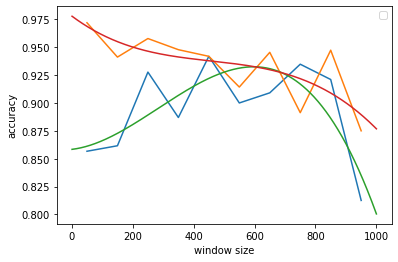

In [37]:
#USING RAW DATA 

NBaccuracies = []
RFaccuracies = []
windows = np.arange(20, 1005, 5)
for w in windows:
    final_data, labels = create_dataset(w)
    print(np.shape(final_data))
    nsamples, nx, ny = np.shape(final_data)
    reformated_data = np.reshape(final_data,(nsamples, nx*ny))
    [X_train, X_test, y_train, y_test] = train_test_split(reformated_data, labels, random_state=0)
    nb = GaussianNB().fit(X_train, y_train)
    NBaccuracies.append(nb.score(X_test, y_test))
    rf = RandomForestClassifier().fit(X_train, y_train)
    RFaccuracies.append(rf.score(X_test, y_test))
    
plt.plot(windows,NBaccuracies)
plt.plot(windows, RFaccuracies)
plt.xlabel('window size')
plt.ylabel('accuracy')
plt.legend('nb', 'rf')

f = np.polyfit(windows, NBaccuracies, 3)
p = np.poly1d(f)
new_x = np.linspace(1,1000, 1000)
plt.plot(new_x, p(new_x))

f = np.polyfit(windows, RFaccuracies, 3)
p = np.poly1d(f)
new_x = np.linspace(1,1000, 1000)
plt.plot(new_x, p(new_x))

plt.show()
    

In [9]:
#feature function block 
def impulse(data_matrix):
    #total impulse function for a single matrix of data 
    #iterates over data and computes the total impulse for all sensors over time 
    fsr_data = data_matrix[:,1:13]
    impulse = 0
    for col in np.arange(1,13):
        single_FSR = data_matrix[:,col]
        time = data_matrix[:,0]
        for i in np.arange(0,len(time)-1):
            delta_t = time[i+1]- time[i]
            averagef = (single_FSR[i+1] + single_FSR[i])/2 
            impulse = impulse + averagef*delta_t
    return impulse 


def jerk(data_matrix): 
    #iterates over data and computes the max jerk for each sensor over time
    #takes the max jerk over all FSR sensors and returns  
    fsr_data = data_matrix[:,1:13]
    jerk_array = []
    for col in np.arange(1,13):
        single_FSR = data_matrix[:,col]
        time = data_matrix[:,0]
        all_jerks = []
        for i in np.arange(0,len(time)-1):
            delta_t = time[i+1] - time[i]
            delta_f = single_FSR[i+1] - single_FSR[i]
            all_jerks.append(delta_f/delta_t)
        jerk_array.append(np.amax(all_jerks))
    max_jerk = np.amax(jerk_array)
    return max_jerk

def max_force(data_matrix):
    #max force readings across all sensors for a single matrix of data 
    fsr_data = data_matrix[:,1:13]
    force_array = [] 
    for col in np.arange(1,13):
        single_FSR = data_matrix[:,col]
        max_force_sensor = np.amax(single_FSR)
        force_array.append(max_force_sensor)
    max_force = np.amax(force_array)
    return max_force

Number of nothing data: 6257
Number of impact data: 976
Number of squeeze data: 1806
(9039,)
(9039, 3)
Number of nothing data: 5003
Number of impact data: 776
Number of squeeze data: 1432
(7211,)
(7211, 3)
Number of nothing data: 4156
Number of impact data: 650
Number of squeeze data: 1199
(6005,)
(6005, 3)
Number of nothing data: 3555
Number of impact data: 555
Number of squeeze data: 1028
(5138,)
(5138, 3)
Number of nothing data: 3108
Number of impact data: 484
Number of squeeze data: 895
(4487,)
(4487, 3)
Number of nothing data: 2756
Number of impact data: 430
Number of squeeze data: 794
(3980,)
(3980, 3)
Number of nothing data: 2491
Number of impact data: 382
Number of squeeze data: 699
(3572,)
(3572, 3)
Number of nothing data: 2251
Number of impact data: 351
Number of squeeze data: 645
(3247,)
(3247, 3)
Number of nothing data: 2062
Number of impact data: 323
Number of squeeze data: 587
(2972,)
(2972, 3)
Number of nothing data: 1896
Number of impact data: 295
Number of squeeze data

(365, 3)
Number of nothing data: 255
Number of impact data: 41
Number of squeeze data: 65
(361,)
(361, 3)
Number of nothing data: 253
Number of impact data: 38
Number of squeeze data: 64
(355,)
(355, 3)
Number of nothing data: 249
Number of impact data: 38
Number of squeeze data: 64
(351,)
(351, 3)
Number of nothing data: 244
Number of impact data: 36
Number of squeeze data: 61
(341,)
(341, 3)
Number of nothing data: 240
Number of impact data: 36
Number of squeeze data: 61
(337,)
(337, 3)
Number of nothing data: 238
Number of impact data: 36
Number of squeeze data: 61
(335,)
(335, 3)
Number of nothing data: 237
Number of impact data: 36
Number of squeeze data: 61
(334,)
(334, 3)
Number of nothing data: 235
Number of impact data: 35
Number of squeeze data: 60
(330,)
(330, 3)
Number of nothing data: 234
Number of impact data: 35
Number of squeeze data: 59
(328,)
(328, 3)
Number of nothing data: 229
Number of impact data: 35
Number of squeeze data: 59
(323,)
(323, 3)
Number of nothing dat

(148, 3)
Number of nothing data: 110
Number of impact data: 17
Number of squeeze data: 21
(148,)
(148, 3)
Number of nothing data: 110
Number of impact data: 17
Number of squeeze data: 21
(148,)
(148, 3)
Number of nothing data: 109
Number of impact data: 17
Number of squeeze data: 21
(147,)
(147, 3)
Number of nothing data: 109
Number of impact data: 14
Number of squeeze data: 20
(143,)
(143, 3)
Number of nothing data: 107
Number of impact data: 14
Number of squeeze data: 20
(141,)
(141, 3)
Number of nothing data: 106
Number of impact data: 14
Number of squeeze data: 20
(140,)
(140, 3)
Number of nothing data: 106
Number of impact data: 14
Number of squeeze data: 20
(140,)
(140, 3)
Number of nothing data: 106
Number of impact data: 14
Number of squeeze data: 20
(140,)
(140, 3)
Number of nothing data: 104
Number of impact data: 13
Number of squeeze data: 18
(135,)
(135, 3)
Number of nothing data: 101
Number of impact data: 13
Number of squeeze data: 18
(132,)
(132, 3)
Number of nothing dat

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:21: UserWarning: Legend does not support 'n' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:21: UserWarning: Legend does not support 'b' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists


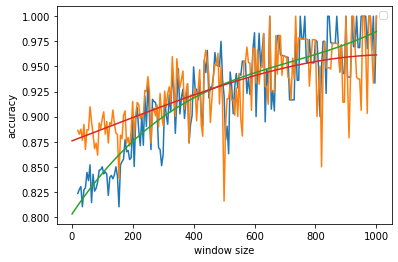

In [14]:
#USING Features 
NBaccuracies = []
RFaccuracies = []
windows = np.arange(20, 1005, 5)
for w in windows:
    final_data, labels = create_dataset(w)
    final_data_features = []
    for d in final_data: 
        final_data_features.append([impulse(d), jerk(d), max_force(d)])
    print(np.shape(final_data_features))
    [X_train, X_test, y_train, y_test] = train_test_split(final_data_features, labels, random_state=0)
    nb = GaussianNB().fit(X_train, y_train)
    NBaccuracies.append(nb.score(X_test, y_test))
    rf = RandomForestClassifier().fit(X_train, y_train)
    RFaccuracies.append(rf.score(X_test, y_test))
    
plt.plot(windows,NBaccuracies)
plt.plot(windows, RFaccuracies)
plt.xlabel('window size')
plt.ylabel('accuracy')
plt.legend('nb', 'rf')

f = np.polyfit(windows, NBaccuracies, 3)
p = np.poly1d(f)
new_x = np.linspace(1,1000, 1000)
plt.plot(new_x, p(new_x))

f = np.polyfit(windows, RFaccuracies, 3)
p = np.poly1d(f)
new_x = np.linspace(1,1000, 1000)
plt.plot(new_x, p(new_x))

plt.show()
    

In [12]:
print(NBaccuracies)

[0.8230088495575221, 0.8351648351648352, 0.8756476683937824, 0.921875, 0.9361702127659575, 0.9305555555555556, 0.9491525423728814, 0.9166666666666666, 0.95, 1.0]


In [17]:
full_data = dataset[70]
len(full_data)

7001

In [44]:
#ANIMATION TRAIN
data, labels = create_dataset(600)
nsamples, nx, ny = np.shape(data)
reformated_data = np.reshape(data,(nsamples, nx*ny))
print(np.shape(reformated_data))
[X_train, X_test, y_train, y_test] = train_test_split(reformated_data, labels, random_state=0)
nb = GaussianNB().fit(X_train, y_train)

Number of nothing data: 171
Number of impact data: 24
Number of squeeze data: 47
(242,)
(242, 9600)


number of frames = 213


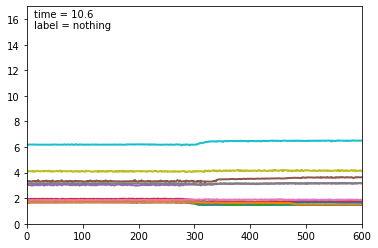

In [62]:
#ANIMATION STUFF
ydata = dataset[23]
sampling_rate = 600
time = np.linspace(0, len(ydata)/sampling_rate, len(ydata))
total_time = len(ydata)/sampling_rate - 1
resolution = 20
f = int(total_time*resolution) 
jump = int(sampling_rate/resolution)

print('number of frames = ' + str((f)))


%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import animation, rc
from IPython.display import HTML
plt.rcParams['animation.ffmpeg_path'] = '/usr/local/bin/ffmpeg'

# First set up the figure, the axis, and the plot element we want to animate
fig, ax = plt.subplots()

ax.set_xlim((0, 600))
ax.set_ylim((0, 17))
time_text = ax.text(0.02, 0.95, '', transform=ax.transAxes)
label_text = ax.text(0.02, 0.90, '', transform=ax.transAxes)

line1, = ax.plot([], [], lw=2)
line2, = ax.plot([], [], lw=2)
line3, = ax.plot([], [], lw=2)
line4, = ax.plot([], [], lw=2)
line5, = ax.plot([], [], lw=2)
line6, = ax.plot([], [], lw=2)
line7, = ax.plot([], [], lw=2)
line8, = ax.plot([], [], lw=2)
line9, = ax.plot([], [], lw=2)
line10, = ax.plot([], [], lw=2)
line11, = ax.plot([], [], lw=2)
line12, = ax.plot([], [], lw=2)

# initialization function: plot the background of each frame
def init():
    line1.set_data([], []) 
    line2.set_data([], []) 
    line3.set_data([], []) 
    line4.set_data([], []) 
    line5.set_data([], []) 
    line6.set_data([], []) 
    line7.set_data([], []) 
    line8.set_data([], []) 
    line9.set_data([], []) 
    line10.set_data([], []) 
    line11.set_data([], []) 
    line12.set_data([], []) 
    time_text.set_text('')
    label_text.set_text('')
    return line1, line2, line3,line4,line5,line6,line7,line8,line9,line10,line11,line12, time_text, label_text


# animation function. This is called sequentially
def animate(i):
    n = i*jump
    #x1 = np.linspace(-2, 0, sampling_rate)
    x2 = np.linspace(0, 600, sampling_rate)
    #y1 = ydata[n-sampling_rate:n]
    y2 = ydata[n:n+sampling_rate,0:16]
    t = round(time[n], 1)
    #x = x1+x2
    #y = y1+y2
    line1.set_data(x2, y2[:,1])
    line2.set_data(x2, y2[:,2])
    line3.set_data(x2, y2[:,3])
    line4.set_data(x2, y2[:,4])
    line5.set_data(x2, y2[:,5])
    line6.set_data(x2, y2[:,6])
    line7.set_data(x2, y2[:,7])
    line8.set_data(x2, y2[:,8])
    line9.set_data(x2, y2[:,9])
    line10.set_data(x2, y2[:,10])
    line11.set_data(x2, y2[:,11])
    line12.set_data(x2, y2[:,12])
    
    #compress to 2D
    nx, ny = np.shape(y2)
    reformated_y = np.reshape(y2,(nx*ny))
    prediction = nb.predict([reformated_y])

    if prediction[0] == 1:
        prediction = 'nothing'
    elif prediction[0] == 2:
        prediction = 'impact'
    else:
        prediction = 'squeeze'
    time_text.set_text('time = ' + str(t))
    label_text.set_text('label = ' + prediction )
    return (line1,line2,line3,line4,line5,line6,line7,line8,line9,line10,line11,line12)

# call the animator. blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames = f, interval=1000/resolution, blit=True)

HTML(anim.to_html5_video())
